<a href="https://colab.research.google.com/github/okeefey/MNIST-Digits-classification/blob/main/MNIST_Digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
%pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape , y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualization

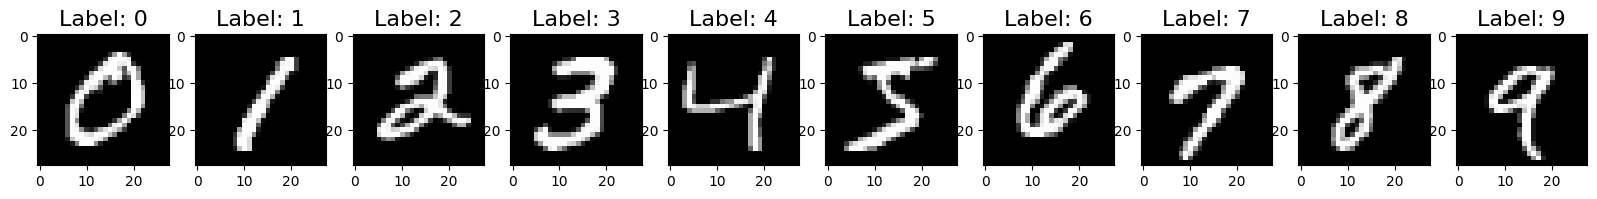

In [4]:
num_classes = 10
f, ax = plt.subplots(1,num_classes, figsize = (20,20))

for i in range (0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=12)

In [5]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Creates an array for each number and adds a 1 depending on which index the number represents.

In [7]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Preparing data

In [8]:
# Normalize data

x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
# Reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model

In [75]:
model = Sequential()
model.add(Dense(units = 128, input_shape=(784,), activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(units = 10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training data

In [60]:
batch_size = 512
epochs = 20
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7147 - loss: 0.9954
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9371 - loss: 0.2199
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9546 - loss: 0.1550
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9649 - loss: 0.1217
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9721 - loss: 0.0960
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9763 - loss: 0.0794
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9815 - loss: 0.0629
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9837 - loss: 0.0562
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9854 - loss: 0.0485
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9872 - loss: 0.0409
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9905 - loss: 0.0344
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

# Evaluate performance

In [66]:
# Before evaluating, ensure y_test is one-hot encoded:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, num_classes=10)

# Now evaluate the model:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0858
Test Loss:  0.07434563338756561
Test Accuracy:  0.9790999889373779


In [67]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.68237378e-07 3.81224936e-08 1.39643125e-05 ... 9.99869347e-01
  3.14973317e-06 5.31635851e-06]
 [1.92635685e-10 1.60387515e-07 9.99999821e-01 ... 1.95630534e-09
  3.23570646e-08 1.06430689e-16]
 [1.25955879e-07 9.99447703e-01 3.24417124e-05 ... 2.61241676e-05
  4.64078970e-04 9.31827842e-08]
 ...
 [7.36867978e-14 3.40326517e-11 2.22406224e-15 ... 1.88382501e-08
  2.95365443e-09 4.28963931e-09]
 [4.18602089e-12 9.21963807e-12 1.14376451e-11 ... 1.48885904e-11
  1.70191598e-07 1.37627063e-12]
 [1.59564514e-10 2.51157568e-14 9.70344985e-12 ... 5.00524962e-18
  2.85630928e-14 6.04177802e-15]]
[7 2 1 ... 4 5 6]


#### Single example

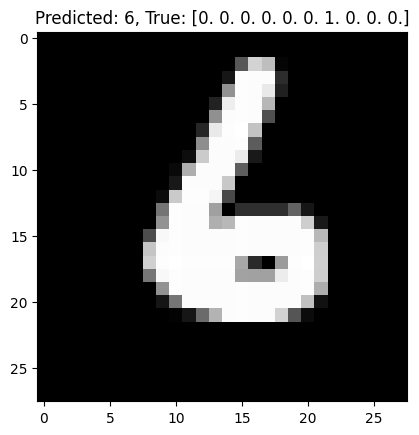

In [68]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
# use the non-categorical y_test for the true label
y_sample_true = y_test[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Predicted: {}, True: {}'.format(y_sample_pred_class, y_sample_true), fontsize=12)
plt.imshow(x_sample.reshape((28,28)), cmap='gray')

#### Confusion Matrix

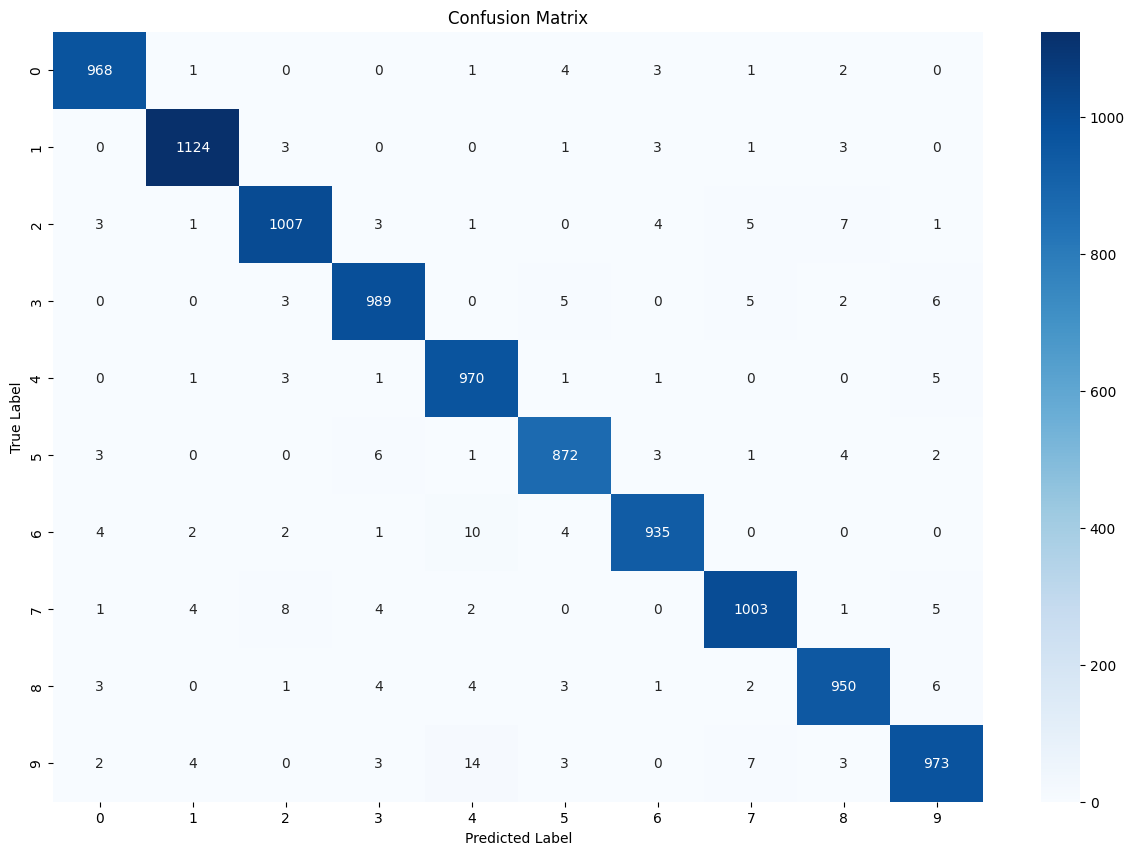

In [71]:
y_true = np.argmax(y_test, axis=1) # Convert y_test to class labels
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

#### Investigation into errors

In [72]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [57]:
y_pred_errors_probability = np.max(y_pred_errors, axis=0)  # Change axis to 0 for 1D array
# OR
y_pred_errors_probability = np.amax(y_pred_errors) # np.amax finds maximum along the flattened array, suitable for 1D arrays.

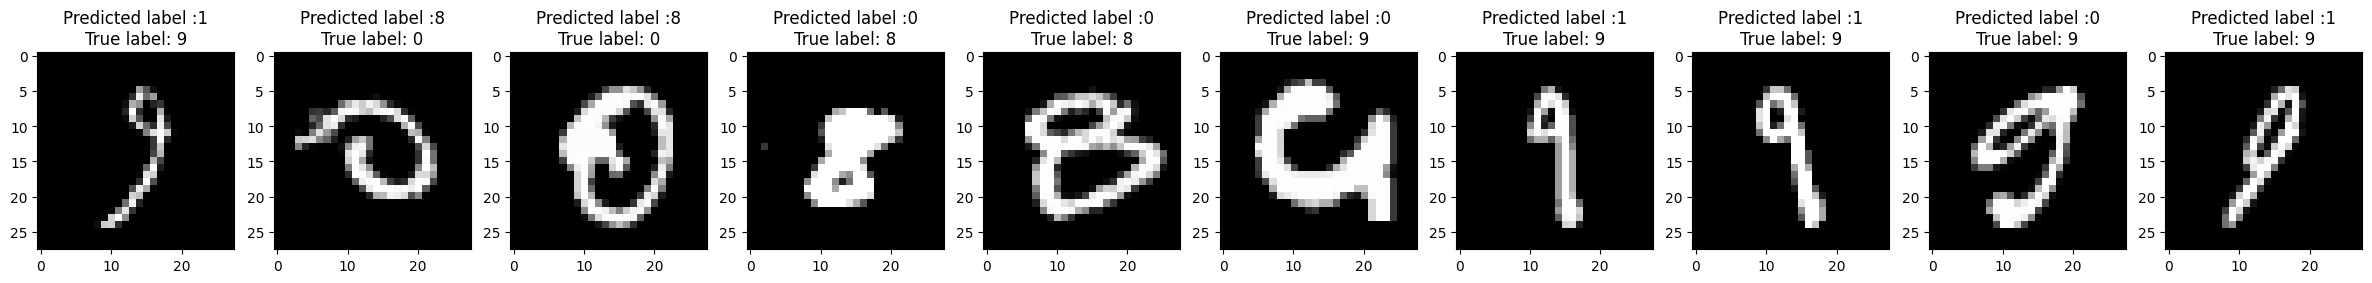

In [73]:
# Show Top Errors
# Assuming you want to show top N errors based on difference between predicted and true labels
diff_errors = np.abs(y_pred_classes_errors - y_true_errors)
# Get indices of top N errors (e.g., top 10)
N = 10  # You can change this to the desired number of top errors
top_idx_diff_errors = np.argpartition(diff_errors, -N)[-N:]

num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=12)